<a href="https://colab.research.google.com/github/kjk26/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [ ]:
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [ ]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
stockStartDate = '2016-01-01'

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-01-09'

In [ ]:
df = pd.DataFrame()

In [ ]:
for stock in assets: 
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [ ]:
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2016-01-04,102.220001,636.989990,24.400942,109.959999,741.840027
2016-01-05,102.730003,633.789978,23.789471,107.660004,742.580017
2016-01-06,102.970001,632.650024,23.323915,117.680000,743.619995
2016-01-07,97.919998,607.940002,22.339539,114.559998,726.390015
2016-01-08,97.330002,607.049988,22.457672,111.389999,714.469971
...,...,...,...,...,...
2021-01-04,268.940002,3186.629883,129.410004,522.859985,1728.239990
2021-01-05,270.970001,3218.510010,131.009995,520.799988,1740.920044
2021-01-06,263.309998,3138.379883,126.599998,500.489990,1735.290039


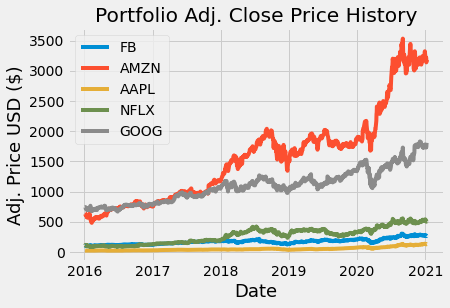

In [ ]:
title = 'Portfolio Adj. Close Price History'
my_stocks = df
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.004989,-0.005024,-0.025059,-0.020917,0.000998
2016-01-06,0.002336,-0.001799,-0.019570,0.093071,0.001400
2016-01-07,-0.049043,-0.039058,-0.042205,-0.026513,-0.023170
2016-01-08,-0.006025,-0.001464,0.005288,-0.027671,-0.016410
...,...,...,...,...,...
2021-01-04,-0.015449,-0.021585,-0.024719,-0.033048,-0.013494
2021-01-05,0.007548,0.010004,0.012364,-0.003940,0.007337
2021-01-06,-0.028269,-0.024897,-0.033662,-0.038998,-0.003234


In [ ]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.108246,0.062263,0.057992,0.062561,0.059932
AMZN,0.062263,0.091908,0.054747,0.071445,0.053170
AAPL,0.057992,0.054747,0.091404,0.055943,0.052320
NFLX,0.062561,0.071445,0.055943,0.164685,0.054625
GOOG,0.059932,0.053170,0.052320,0.054625,0.069342


In [ ]:
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06782316761615181

In [ ]:
port_volatality = np.sqrt(port_variance)
port_volatality

0.2604288148729933

In [ ]:
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3196786305571258

In [ ]:
percent_var = str( round(port_variance, 2) *100) + '%'
percent_vols = str( round(port_volatality , 2) *100) + '%'
percent_ret = str( round(portfolioSimpleAnnualReturn, 2) *100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatality / risk: '+ percent_vols)
print('Annual variance: '+ percent_var)

Expected annual return: 32.0%
Annual volatality / risk: 26.0%
Annual variance: 7.000000000000001%


In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.4091), ('AAPL', 0.55068), ('NFLX', 0.04022), ('GOOG', 0.0)])
Expected annual return: 39.0%
Annual volatility: 27.0%
Sharpe Ratio: 1.37


(0.39022196343829557, 0.26993064575017045, 1.3715447625793034)

In [ ]:
0.0 + 0.4091 + 0.55068 + 0.04022 + 0.0

1.0

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 2, 'AAPL': 61, 'NFLX': 1}
Funds remaining: $69.15
